# **Import Library**

In [ ]:
import pandas as pd              # Import library Pandas untuk manipulasi data tabular
import numpy as np               # Import library Numpy untuk operasi numerik
import matplotlib.pyplot as plt  # Import library Matplotlib untuk visualisasi data
import seaborn as sns            # Import library Seaborn untuk visualisasi data yang lebih interaktif

# Import library Warnings untuk mengabaikan pesan peringatan
import warnings
warnings.filterwarnings('ignore')

# Menetapkan opsi Pandas untuk menampilkan semua kolom tanpa pembatasan
pd.set_option('display.max_columns', None)

# Menetapkan opsi Pandas untuk menampilkan semua baris tanpa pembatasan
pd.set_option('display.max_rows', None)

# **Import Dataset**

In [ ]:
# Membaca file CSV dengan nama 'COVIDiSTRESS_April_27_clean.csv' menggunakan pd.read_csv()
# Menggunakan encoding iso-8859-1 dan menggunakan kolom pertama sebagai index (index_col = 0)
df = pd.read_csv('COVIDiSTRESS_April_27_clean.csv', encoding = 'iso-8859-1', index_col = 0)

# Menampilkan 5 baris pertama dari DataFrame 'df' menggunakan fungsi head()
df.head()

,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_islolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,AD_check,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_Lon_1,Scale_Lon_2,Scale_Lon_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,Expl_Distress_txt,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_coping_txt,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Final_open,PSS10_avg,Lon_avg,neu,ext,ope,agr,con,SPS_avg
1,1058,2020-04-27 04:20:30,DA,33,Female,"College degree, bachelor, master",Some College or equivalent,Full time employed,Denmark,yes,Aarhus,Married/cohabiting,0.0,Yes,Life carries on with minor changes,2.0,0.0,Program A,NaN,No,2.0,2.0,1.0,5.0,5.0,2.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,9.0,10.0,5.0,7.0,8.0,9.0,9.0,8.0,2.0,3.0,2.0,3.0,5.0,5.0,6.0,5.0,5.0,2.0,4.0,1.0,2.0,2.0,5.0,5.0,6.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,1.0,99.0,1.0,1.0,2.0,99.0,2.0,99.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,2.0,1.0,3.0,4.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,5.0,6.0,1.0,5.0,NaN,4.0,4.0,4.0,3.0,1.0,3.0,NaN,1.6,2.333333,2.000000,5.000000,4.666667,4.000000,3.666667,6.000000
2,1323,2020-04-27 04:17:16,NL,52,Male,"College degree, bachelor, master",Up to 12 years of school,Self-employed,Netherlands,no,Flevoland,Divorced/widowed,0.0,No,Life carries on with minor changes,2.0,0.0,Program A,NaN,No,1.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0,1.0,3.0,2.0,4.0,7.0,8.0,7.0,8.0,7.0,8.0,7.0,8.0,4.0,4.0,4.0,5.0,6.0,8.0,5.0,4.0,4.0,5.0,4.0,2.0,6.0,4.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,99.0,3.0,2.0,4.0,99.0,2.0,99.0,99.0,2.0,4.0,4.0,NaN,4.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,6.0,1.0,NaN,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,4.0,4.0,3.0,3.0,5.0,5.0,1.0,5.0,NaN,5.0,6.0,3.0,4.0,3.0,4.0,Ik ben blij met de 'intelligente lockdown' zoa...,2.5,3.000000,4.666667,3.666667,5.000000,4.333333,4.666667,4.400000
3,801,2020-04-27 04:05:14,SK,52,Female,"College degree, bachelor, master",College degree,Full time employed,Slovakia,no,Trenciansky,Divorced/widowed,0.0,Yes,Life carries on with minor changes,2.0,2.0,Program A,NaN,Not sure,3.0,5.0,3.0,5.0,3.0,2.0,5.0,4.0,2.0,2.0,4.0,4.0,3.0,6.0,9.0,6.0,7.0,7.0,7.0,7.0,6.0,4.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,2.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,5.0,2.0,2.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,NaN,5.0,5.0,6.0,6.0,4.0,5.0,6.0,NaN,5.0,5.0,5.0,6.0,6.0,4.0,5.0,5.0,2.0,3.0,4.0,5.0,4.0,6.0,6.0,5.0,3.0,3.0,NaN,4.0,5.0,5.0,4.0,4.0,4.0,NaN,2.4,3.666667,3.000000,4.3333

In [ ]:
# Memperoleh daftar nama kolom dari dataframe
df.columns

Index(['Duration..in.seconds.', 'RecordedDate', 'UserLanguage', 'Dem_age',
       'Dem_gender', 'Dem_edu', 'Dem_edu_mom', 'Dem_employment', 'Country',
       'Dem_Expat',
       ...
       'Expl_media_6', 'Final_open', 'PSS10_avg', 'Lon_avg', 'neu', 'ext',
       'ope', 'agr', 'con', 'SPS_avg'],
      dtype='object', length=135)

# **Data Preprocessing**

## Feature Selection I - Drop Unrelevant Features

Fitur seleksi (feature selection) dapat membantu mengurangi jumlah atribut yang tidak relevan atau redundan dalam analisis data. Berikut adalah beberapa atribut yang dapat dihapus berdasarkan domain knowledge untuk menghemat waktu dan tenaga:

- Duration..in.seconds. : atribut ini tidak memiliki relevansi terhadap analisis karena hanya mencatat durasi pengisian kuesioner.

- RecordedDate : atribut ini tidak memiliki relevansi terhadap analisis karena hanya mencatat tanggal dan waktu pengisian kuesioner.

- UserLanguage : atribut ini tidak memiliki relevansi terhadap analisis karena hanya mencatat bahasa yang digunakan oleh pengisi kuesioner.

- Dem_edu_mom : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara tingkat pendidikan ibu dan respon terhadap pandemi.

- Dem_Expat : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara status ekspatriat dan respon terhadap pandemi.

- Dem_state : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara lokasi tempat tinggal dan respon terhadap pandemi.

- Dem_isolation_adults : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara jumlah orang dewasa yang tinggal di rumah dan respon terhadap pandemi.

- Dem_isolation_kids : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara jumlah anak yang tinggal di rumah dan respon terhadap pandemi.

- AD_check : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_people_1 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_people_2 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_1 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_2 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_3 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_4 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_5 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- OECD_insititutions_6 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- Trust_countrymeasure : atribut ini dapat dihapus karena tidak ada korelasi yang kuat antara tingkat kepercayaan pada pemerintah dan respon terhadap pandemi.

- BFF_15_1 sampai BFF_15_15 : atribut ini dapat dihapus karena tidak memiliki relevansi terhadap analisis dan tidak memberikan informasi yang berguna.

- Dem_dependents: Atribut ini dapat dihapus karena informasi tentang apakah seseorang memiliki tanggungan atau tidak tidak akan berdampak signifikan pada penggalian insight maupun modeling.

- Dem_isolation_adults dan Dem_isolation_kids: Atribut ini dapat dihapus karena tidak memiliki korelasi kuat dengan atribut lain dalam dataset dan tidak memberikan informasi yang cukup signifikan.

- OECD_people_1 dan OECD_people_2: Atribut ini dapat dihapus karena tidak terkait dengan pandemi COVID-19 dan tidak memberikan informasi yang cukup signifikan dalam dataset.

- OECD_insititutions_1 hingga OECD_insititutions_6: Atribut ini dapat dihapus karena informasi tentang kepercayaan seseorang pada institusi-institusi tertentu tidak terlalu berhubungan dengan pandemi COVID-19 dan tidak akan berdampak signifikan pada penggalian insight maupun modeling.

- Expl_Distress_txt: Atribut ini dapat dihapus karena informasi tentang teks jawaban responden pada pertanyaan ini sulit untuk diolah secara kuantitatif dan tidak memberikan informasi yang cukup signifikan.

- Expl_coping_txt: Atribut ini dapat dihapus karena informasi tentang teks jawaban responden pada pertanyaan ini sulit untuk diolah secara kuantitatif dan tidak memberikan informasi yang cukup signifikan.

In [ ]:
# list kolom-kolom yang tidak diperlukan
unused_cols = [
    'Duration..in.seconds.',
    'RecordedDate',
    'UserLanguage',
    'Dem_edu_mom',
    'Dem_employment',
    'Dem_state',
    'Dem_dependents',
    'Dem_isolation_adults',
    'Dem_Expat',
    'AD_gain',
    'AD_loss',
    'AD_check',
    'Scale_PSS10_UCLA_1',
    'Scale_PSS10_UCLA_2',
    'Scale_PSS10_UCLA_3',
    'Scale_PSS10_UCLA_4',
    'Scale_PSS10_UCLA_5',
    'Scale_PSS10_UCLA_6',
    'Scale_PSS10_UCLA_7',
    'Scale_PSS10_UCLA_8',
    'Scale_PSS10_UCLA_9',
    'Scale_PSS10_UCLA_10',
    'Scale_Lon_1',
    'Scale_Lon_2',
    'Scale_Lon_3',
    'OECD_people_1',
    'OECD_people_2',
    'OECD_insititutions_1',
    'OECD_insititutions_2',
    'OECD_insititutions_3',
    'OECD_insititutions_4',
    'OECD_insititutions_5',
    'OECD_insititutions_6',
    'Corona_concerns_1',
    'Corona_concerns_2',
    'Corona_concerns_3',
    'Corona_concerns_4',
    'Corona_concerns_5',
    'Trust_countrymeasure',
    'Compliance_1',
    'Compliance_2',
    'Compliance_3',
    'Compliance_4',
    'Compliance_5',
    'Compliance_6',
    'BFF_15_1',
    'BFF_15_2',
    'BFF_15_3',
    'BFF_15_4',
    'BFF_15_5',
    'BFF_15_6',
    'BFF_15_7',
    'BFF_15_8',
    'BFF_15_9',
    'BFF_15_10',
    'BFF_15_11',
    'BFF_15_12',
    'BFF_15_13',
    'BFF_15_14',
    'BFF_15_15',
    'Expl_Distress_1',
    'Expl_Distress_2',
    'Expl_Distress_3',
    'Expl_Distress_4',
    'Expl_Distress_5',
    'Expl_Distress_6',
    'Expl_Distress_7',
    'Expl_Distress_8',
    'Expl_Distress_9',
    'Expl_Distress_10',
    'Expl_Distress_11',
    'Expl_Distress_12',
    'Expl_Distress_13',
    'Expl_Distress_14',
    'Expl_Distress_15',
    'Expl_Distress_16',
    'Expl_Distress_17',
    'Expl_Distress_18']

# Menghapus kolom yang tidak digunakan dari Dataframe 'df'
df = df.drop(columns = unused_cols)

# Menampilkan 5 baris pertama dari Dataframe 'df' yang telah berubah
df.head()

,Dem_age,Dem_gender,Dem_edu,Country,Dem_maritalstatus,Dem_riskgroup,Dem_islolation,Dem_isolation_kids,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,Expl_Distress_txt,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_coping_txt,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Final_open,PSS10_avg,Lon_avg,neu,ext,ope,agr,con,SPS_avg
1,33,Female,"College degree, bachelor, master",Denmark,Married/cohabiting,Yes,Life carries on with minor changes,0.0,4.0,3.0,2.0,1.0,3.0,4.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,5.0,6.0,1.0,5.0,NaN,4.0,4.0,4.0,3.0,1.0,3.0,NaN,1.6,2.333333,2.000000,5.000000,4.666667,4.000000,3.666667,6.000000
2,52,Male,"College degree, bachelor, master",Netherlands,Divorced/widowed,No,Life carries on with minor changes,0.0,4.0,4.0,1.0,3.0,6.0,1.0,NaN,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,4.0,4.0,3.0,3.0,5.0,5.0,1.0,5.0,NaN,5.0,6.0,3.0,4.0,3.0,4.0,Ik ben blij met de 'intelligente lockdown' zoa...,2.5,3.000000,4.666667,3.666667,5.000000,4.333333,4.666667,4.400000
3,52,Female,"College degree, bachelor, master",Slovakia,Divorced/widowed,Yes,Life carries on with minor changes,2.0,5.0,4.0,4.0,4.0,4.0,5.0,NaN,5.0,5.0,6.0,6.0,4.0,5.0,6.0,NaN,5.0,5.0,5.0,6.0,6.0,4.0,5.0,5.0,2.0,3.0,4.0,5.0,4.0,6.0,6.0,5.0,3.0,3.0,NaN,4.0,5.0,5.0,4.0,4.0,4.0,NaN,2.4,3.666667,3.000000,4.333333,4.333333,5.000000,4.666667,5.222222
4,47,Male,"Some College, short continuing education or eq...",Slovakia,Divorced/widowed,Yes,Life carries on with minor changes,NaN,99.0,5.0,5.0,4.0,6.0,1.0,NaN,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,4.0,2.0,5.0,NaN,5.0,5.0,4.0,5.0,2.0,5.0,NaN,3.1,2.666667,3.333333,4.333333,4.666667,3.666667,5.333333,4.700000
5,71,Male,"Some College, short continuing education or eq...",Slovakia,Married/cohabiting,Yes,Isolated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,NaN,6.0,4.0,5.0,4.0,3.0,3.0,NaN,5.0,5.0,4.0,3.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,3.000000,2.666667,4.000000,4.000000,4.333333,4.000000,4.700000


## Feature Selection II - Based on Missing Values Percentage

In [ ]:
# Inisialisasi list kosong untuk menyimpan nilai missing value
lst_missval = []

# Looping untuk setiap nilai missing value pada tiap kolom Dataframe 'df'
for i in df.isnull().sum():
  # Hitung persentase missing value tiap kolom
  lst_missval.append((i / len(df) * 100))

# Buat dataframe baru dengan kolom "Column Name" dan "Missing Value Percentage (%)"
df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2)})

# Hapus kolom yang tidak memiliki missing value
df_missval = df_missval[df_missval['Missing Value Percentage (%)'] != 0]

# Urutkan persentase dari nilai missing value tertinggi
df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

# Tampilkan dataframe df_missval yang berisi info persentase missing value 'df'
df_missval

,Column Name,Missing Value Percentage (%)
0,Expl_coping_txt,94.24
1,Expl_Distress_txt,91.56
2,Final_open,79.49
3,Expl_Coping_4,26.29
4,Expl_Coping_13,25.82
5,Expl_Coping_8,25.67
6,Expl_Coping_5,25.66
7,Expl_media_2,25.64
8,Expl_media_3,25.61
9,Expl_media_4,25.61


**Interpretasi**

Berdasarkan output di atas, kami memutuskan untuk menghapus kolom yang memiliki nilai persentase di atas 40%.

Hal ini berdasarkan pertimbangan :
- Kolom dengan missing value diatas 40% adalah 'Final_open', 'Expl_Distress_txt', dan 'Expl_coping_txt'. Kolom-kolom ini berisi open question yang tidak wajib dijawab oleh responden, sehingga dapat dipertimbangkan untuk tidak mengikutsertakan kolom tersebut dalam analisis selanjutnya.
- Kolom dengan missing value yang tinggi dapat mempengaruhi akurasi dan kehandalan hasil analisis, karena jika % missing value suatu data terlalu besar, imputasi dapat menyebabkan overfitting.
- Jika dilakukan imputasi, informasi baru ditambahkan sehingga machine mempelajari info yang sebenarnya tidak ada dalam data asli, sehingga tidak mampu melakukan generalisasi dengan baik pada data baru.

In [ ]:
# Mengambil nama kolom yang memiliki missing value diatas 40%
df_missval_remove_cols = df_missval[df_missval['Missing Value Percentage (%)'] > 40 ][['Column Name']]

# Menghapus kolom-kolom yang memiliki missing value diatas 40%
df = df.drop(columns = df_missval_remove_cols['Column Name'])

## Check Data Types

In [ ]:
# Membuat Dataframe kosong untuk menyimpan hasil pengecekan tipe data
df_dtypes = pd.DataFrame({'Columns':df.columns})

# Membuat list kosong untuk menyimpan nilai acak setiap kolom
lst_nilai = []

# Melakukan iterasi pada setiap kolom di Dataframe
for i in df_dtypes['Columns']:
  # Mengambil nilai acak pada seitap kolom
  lst_nilai.append(df[[i]].sample(1).values[[0]])

# Menambahkan kolom 'Value' pada Dataframe 'df_dtypes', kemudian masukkan nilai acak sebelumnya
df_dtypes['Value'] = lst_nilai
# Menambahkan kolom 'Data Types' pada Dataframe 'dt_dtypes', kemudian masukkan tipe data masing-masing
df_dtypes['Data Types'] = df.dtypes.values

# Melakukan reset index pada DataFrame 'dt_dtypes' dan menghapus kolom 'index'
df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])

# Menampilkan Dataframe 'df_dtypes'
df_dtypes

,Columns,Value,Data Types
0,Dem_age,[[48]],int64
1,Dem_gender,[[Female]],object
2,Dem_edu,"[[College degree, bachelor, master]]",object
3,Country,[[Japan]],object
4,Dem_maritalstatus,[[Single]],object
5,Dem_riskgroup,[[Not sure]],object
6,Dem_islolation,[[Life carries on with minor changes]],object
7,Dem_isolation_kids,[[0.0]],float64
8,Expl_Distress_19,[[6.0]],float64
9,Expl_Distress_20,[[nan]],float64


**Interpretasi**

Berdasarkan *output* di atas, dapat dilihat bahwa tiap kolom pada DataFrame ini sudah memiliki tipe data yang tepat dan tidak perlu diubah lagi.

## Missing Values Imputation

In [ ]:
# Membuat list kosong untuk menyimpan persentase missing value
lst_missval = []

# Loop untuk menghitung jumlah missing value setiap kolom
for i in df.isnull().sum():
  # Menghitung persentase missing value
  lst_missval.append((i / len(df) * 100))

# Membuat dataframe untuk menyimpan informasi missing value
df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

# Filter hanya kolom yang memiliki missing value
df_missval = df_missval[df_missval['Missing Value Percentage (%)'] != 0]

# Menghapus kolom yang tidak diperlukan berdasarkan filtrasi
df_missval = df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

# Mengembalikan dataframe yang berisi info missing value pada setiap kolom
df_missval

,Column Name,Missing Value Percentage (%),Data Types
0,Expl_Coping_4,26.29,float64
1,Expl_Coping_13,25.82,float64
2,Expl_Coping_8,25.67,float64
3,Expl_Coping_5,25.66,float64
4,Expl_media_2,25.64,float64
5,Expl_media_4,25.61,float64
6,Expl_media_3,25.61,float64
7,Expl_media_1,25.61,float64
8,Expl_media_5,25.60,float64
9,Expl_media_6,25.59,float64


In [ ]:
# Define kolom kategorik yang akan diimputasi
categoric_cols = ['Dem_islolation', 'Dem_maritalstatus', 'Dem_edu', 'Dem_riskgroup',
                  'Country', 'Dem_gender']

# Imputasi missing values untuk tiap kolom berdasarkan tipe data (kategorik/numerik)
for cols in df_missval['Column Name']:
  # Jika kolom merupakan kategorik, imputasi dengan modus
  if cols in categoric_cols:
    df[cols] = df[cols].fillna(df[cols].mode()[0])
  # Jika kolom merupakan numerik, imputasi dengan median
  else:
    df[cols] = df[cols].fillna(df[cols].median())

# preparing the worst case
df = df.dropna()

## Check Duplicate Values

In [ ]:
# menampilkan jumlah baris data duplikat
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 1019


In [ ]:
# menghapus data duplikat
df = df.drop_duplicates()

In [ ]:
# menampilkan jumlah baris data duplikat
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


## Outlier Detection

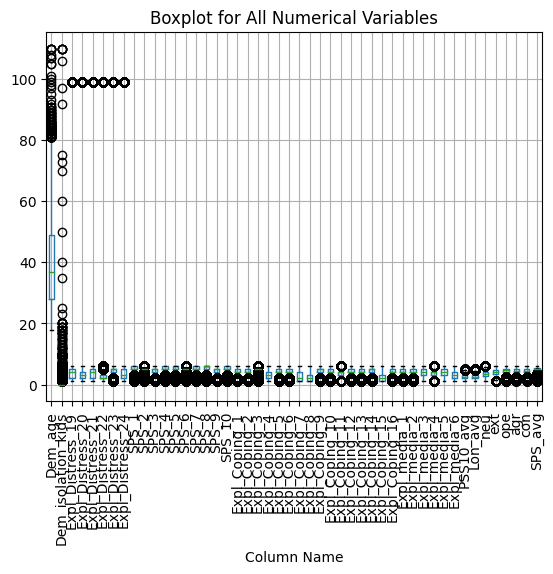

In [ ]:
# Membuat boxplot untuk semua variabel numerik dataset
df.boxplot()

# Menambahkan judul boxplot
plt.title('Boxplot for All Numerical Variables')

# Menambahkan label pada sumbu x
plt.xlabel('Column Name')

# Memutar label sumbu x sebesar 90 derajat
plt.xticks(rotation=90)

# Menampilkan boxplot
plt.show()

In [ ]:
# Menghitung IQR (interquartile range) untuk setiap kolom
Q1 = df.quantile(0.25) # Q1 adalah kuratil pertama df
Q3 = df.quantile(0.75) # Q3 adalah kuartil ketiga df
IQR = Q3 - Q1

# Menghapus baris yang memiliki nilai di luar batas-batas
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Nilai di luar rentang Q1 - 1,5 * IQR hingga Q3 + 1,5 * IQR dianggap outlier
# Penggunaan tanda negasi (~) untuk ambil baris yang tidak mengandung nilai di luar batas outlier
# any(axis=1) untuk mengecek setiap baris pada dataset

Baris yang tidak mengandung nilai di luar batas outlier akan tetap pada dataset, sementara yang di luar batas outlier akan dihapus.

# **Exploratory Data Analysis**

## Descriptive Statistics

In [ ]:
df.describe()

,Dem_age,Dem_isolation_kids,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,Lon_avg,neu,ext,ope,agr,con,SPS_avg
count,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000,114194.000000
mean,39.081712,0.397122,5.025063,6.788894,4.932764,3.779586,5.434918,7.190027,5.078796,4.879398,4.648642,4.926275,5.030825,4.836541,5.037410,5.384906,4.620015,5.088954,3.936844,4.037970,4.854134,3.050169,4.028565,4.072981,2.596196,2.457012,4.575985,3.944594,3.498012,4.068033,4.016419,4.684108,2.330035,4.149763,4.126977,4.021218,3.793369,3.621048,3.926660,3.185194,2.629611,2.545837,3.334234,3.960520,4.519608,4.416748,4.342598,4.928316
std,13.986240,1.315880,11.508796,18.163434,11.284096,11.653226,9.402293,19.485576,0.901598,0.958561,1.096659,1.020386,0.984985,0.945962,0.966056,1.029415,1.029738,0.895425,1.192403,1.355227,1.023372,1.363782,1.279360,1.187175,1.568408,1.498684,1.123051,1.112613,1.249339,1.140857,1.229479,1.055440,1.511311,1.118784,1.249791,1.271887,1.338677,1.235295,1.308047,1.211105,0.708253,0.963062,0.985469,1.047869,0.867200,0.774220,0.826084,0.748685
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,0.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.100000,2.000000,2.666667,3.333333,4.000000,4.000000,4.000000,4.700000
50%,37.000000,0.000000,4.000000,3.000000,4.000000,2.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.600000,2.333333,3.333333,4.000000,4.666667,4.333333,4.333333,5.000000
75%,49.000000,0.000000,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,3.100000,3.000000,4.000000,4.666667,5.000000,5.000000,5.000000,5.400000
max,110.000000,110.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000

Hasil statistik deskriptif tersebut menunjukkan beberapa informasi penting tentang atribut-atribut yang ada di dalam DataFrame.

- Dem_age: variabel usia responden memiliki nilai minimum 18 dan maksimum 110 dengan rata-rata usia responden sebesar 39 tahun. Standar deviasi yang cukup besar (sekitar 14 tahun) menunjukkan adanya variasi yang signifikan dalam usia responden.
- Dem_isolation_kids: variabel ini mengindikasikan apakah responden sedang melakukan isolasi diri bersama anak-anaknya atau tidak. Dapat dilihat bahwa sebagian besar responden (lebih dari 75%) tidak melakukan isolasi diri bersama anak-anak.
- Lon_avg: variabel ini mengindikasikan tingkat kesepian yang dirasakan oleh responden. Nilai rata-rata sebesar 2.54 menunjukkan bahwa responden merasa sedikit kesepian.
- neu: variabel ini mengindikasikan tingkat neurotisisme pada responden. Nilai rata-rata sebesar 3.33 menunjukkan bahwa responden cenderung memiliki tingkat neurotisisme yang sedang.
- SPS_avg: variabel ini mengindikasikan kecenderungan responden untuk mencari dan memelihara hubungan sosial. Nilai rata-rata sebesar 4.93 menunjukkan bahwa responden cenderung memiliki kecenderungan yang tinggi dalam mencari dan memelihara hubungan sosial.

Dalam statistik deskriptif tersebut, tidak terdapat nilai yang sangat ekstrim atau aneh (seperti nilai minimum atau maksimum yang sangat jauh dari rata-rata), sehingga dapat disimpulkan bahwa data tidak mengandung noise atau anomaly yang signifikan.

## Data Distribution

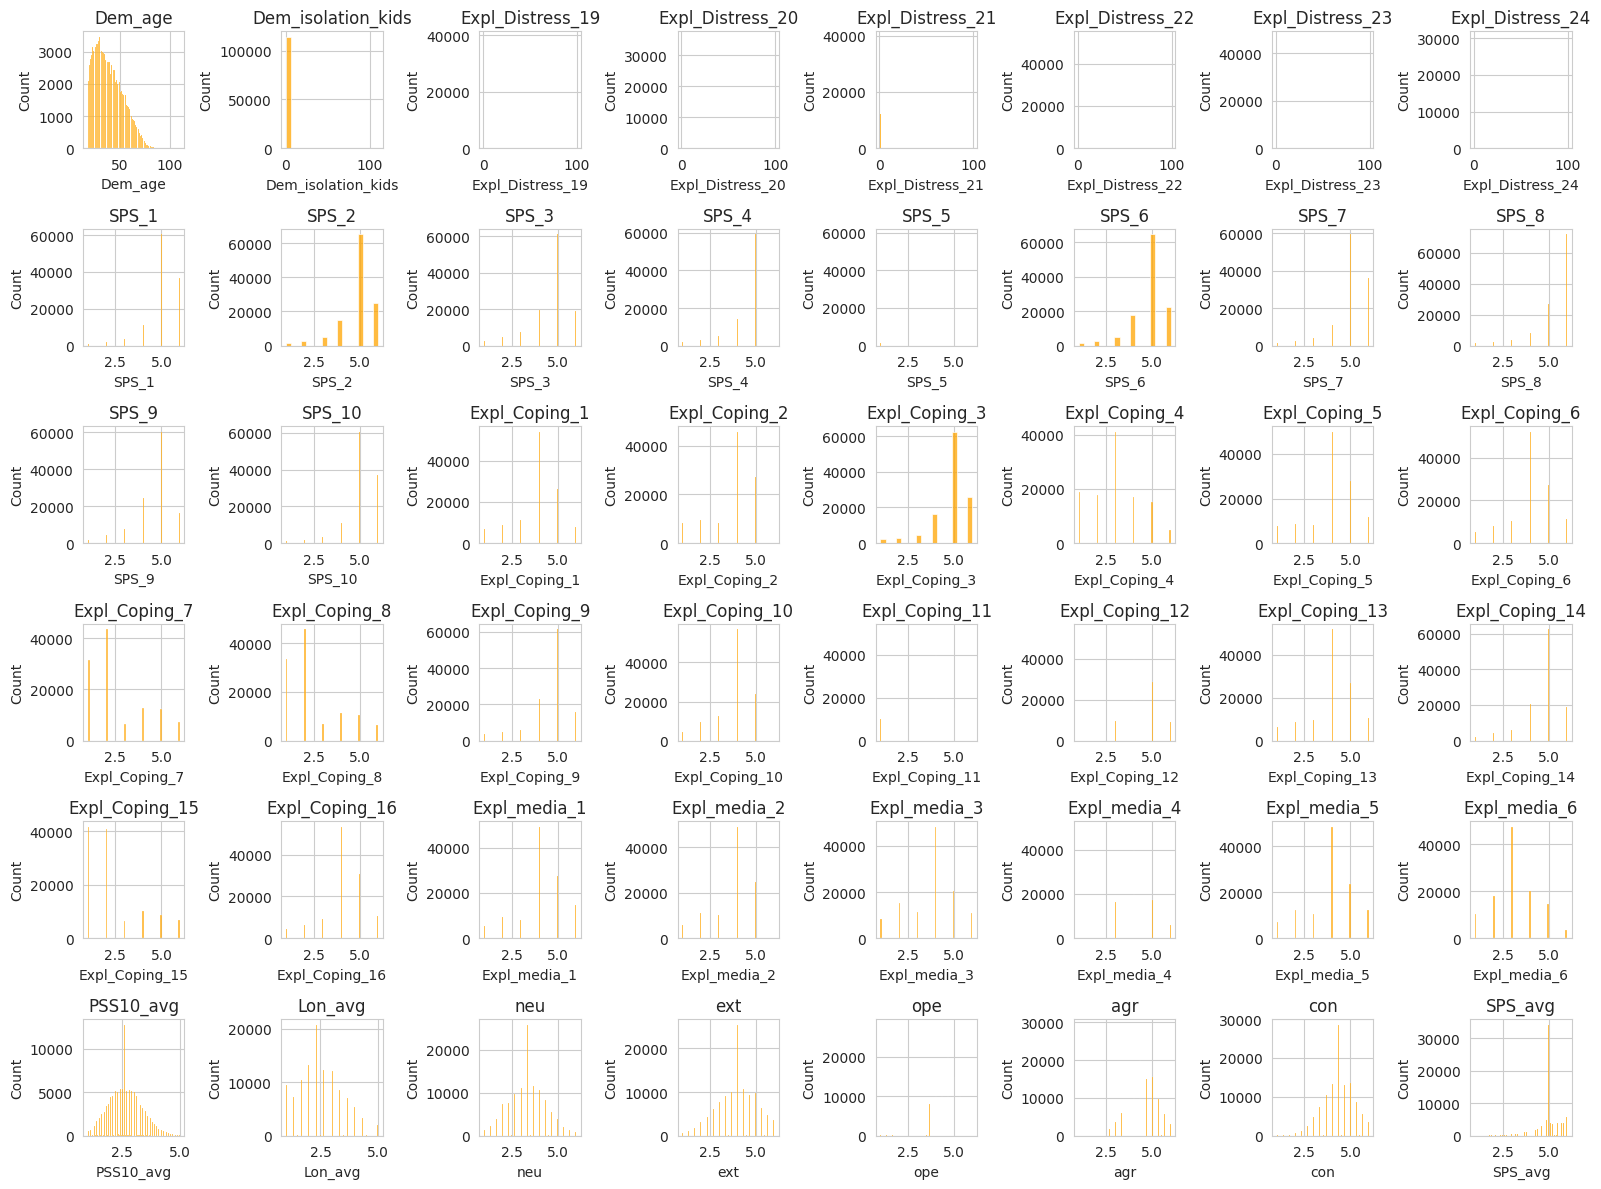

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran 16x12 dan 6 baris, 8 kolom subplot
fig, ax = plt.subplots(6, 8, figsize=(16, 12))

# Menentukan style plotting dengan whitegrid
sns.set_style('whitegrid')

# Membuat list variabel numerik dari dataframe 'df'
num_vars = df.select_dtypes(include='number').columns.tolist()

# Looping sebanyak variabel numerik dalam list 'num_vars'
for i, var in enumerate(num_vars):
    row = i // 8  # Menghitung index baris untuk subplot
    col = i % 8   # Menghitung index kolom untuk subplot
    sns.histplot(df[var], ax=ax[row, col], kde=False, color='orange') # Membuat histogram pada subplot
    ax[row, col].set_title(var) # Menambahkan judul pada subplot

# Menentukan jarak antar subplot agar rapi
plt.tight_layout()
# Menampilkan figure
plt.show()


Hasil visualisasi histogram menunjukkan distribusi variabel numerik pada DataFrame. Berikut adalah beberapa interpretasi yang dapat diberikan:

- Variabel Dem_age menunjukkan bahwa mayoritas responden berusia antara 20-60 tahun, dengan puncak distribusi berada pada rentang usia 30-40 tahun.

- Variabel Dem_isolation_kids menunjukkan bahwa mayoritas responden tidak dalam kondisi isolasi dengan anak-anak.

- Variabel Lon_avg menunjukkan bahwa mayoritas responden memiliki nilai rata-rata kesepian antara 2-3, dengan nilai puncak pada 2.

- Variabel neu menunjukkan bahwa mayoritas responden memiliki skor neurotisme yang relatif rendah, dengan puncak distribusi berada pada skor 3.

- Variabel SPS_avg menunjukkan bahwa mayoritas responden memiliki skor pengukuran teori ketergantungan sosial (Social Provisions Scale) di atas rata-rata, dengan puncak distribusi berada pada skor 5.

# **Data Quality**

Berdasarkan tahapan preprocessing yang telah dilakukan sebelumnya, serta hasil deskriptif dan visualisasi histogram, dapat dilakukan penilaian kualitas data sebagai berikut:

- Missing Values: Terdapat nilai kosong pada DataFrame, sehingga ditemukan masalah pada missing values. Namun, masalah ini berhasil diselesaikan dengan cara melakukan penghapusan dan imputasi

- Duplikasi: telah dilakukan pengecekan terhadap duplikasi pada DataFrame dan ditemukan 1019 baris data yang merupakan duplikat. Masalah ini juga berhasil diatasi dengan melakukan penghapusan data duplikat tersebut.

- Outlier: telah dilakukan pengecekan terhadap nilai outlier pada variabel numerik dan ditemukan adanya outlier pada beberapa variabel. Masalah ini juga berhasil diselesaikan dengan melakukan penghapusan berdasarkan nilai IQR



# **Insights**

Setelah melakukan analisis terhadap data yang diberikan, terdapat beberapa informasi/insight paling berharga sebagai berikut:

- Mayoritas responden berada pada rentang usia 18-110 tahun, dengan rata-rata usia sebesar 39 tahun.
- Sebagian besar responden tidak dalam kondisi isolasi bersama anak, dengan nilai rata-rata sebesar 0.397.
- Nilai rata-rata dari skor Big Five Personality Traits adalah: neuroticism (3.334), extraversion (3.960), openness (4.519), agreeableness (4.416), dan conscientiousness (4.342).
- Skor rata-rata dari Social Provisions Scale (SPS) adalah 4.928.
- Mayoritas responden berada pada rentang nilai Lon_avg di antara 2-3, dengan nilai rata-rata sebesar 2.546.

Berikut adalah beberapa rekomendasi/saran terkait data:

- Untuk meningkatkan kualitas data, dapat dilakukan penambahan variabel baru atau pengumpulan data tambahan dari responden yang berbeda.
- Melakukan pengolahan data lebih lanjut dengan menggunakan teknik analisis yang sesuai untuk menghasilkan informasi yang lebih detail dan bermanfaat.